In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#https://github.com/Benjamin-Lee/deep-rules/blob/62e2d6997f9cb3c876959c4623e9f61dd52ffa07/content/images/overfitting.ipynb
n_points = 20
m = 1
b = 0
delta_range = 6
np.random.seed(0)


In [3]:
points_x = np.arange(n_points)
training_delta = np.random.uniform(delta_range / -2.0, delta_range / 2.0, size=(n_points))
training_points_y = m*points_x + b + training_delta

testing_points_x = points_x + n_points
testing_delta = np.random.uniform(delta_range / -2.0, delta_range / 2.0, size=(n_points))
testing_points_y = m*testing_points_x + b + testing_delta

In [4]:
overfitted = np.poly1d(np.polyfit(points_x, training_points_y, n_points))


/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
x_space = np.linspace(-(n_points/5), 2*n_points+(n_points/5), n_points*10)
overfitted_x_space = np.linspace(-(n_points/5), 2*n_points+(n_points/5), n_points*10)

In [6]:
y_overfitted = overfitted(x_space)


In [7]:
def rgb_to_np_rgb(r, g, b):
    return (r / 255, g / 255, b / 255) 

orange = rgb_to_np_rgb(230, 159, 0)
blueish_green = rgb_to_np_rgb(0, 158, 115)
vermillion = rgb_to_np_rgb(213, 94, 0)
blue = rgb_to_np_rgb(0, 114, 178)

In [8]:
print(plt.rcParams["figure.figsize"])


[6.0, 4.0]


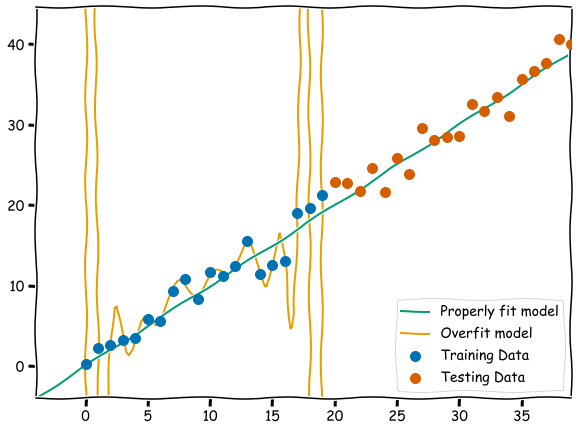

In [9]:
plt.rcParams["figure.figsize"] = (12.8 * 0.75, 9.6 * 0.75)
plt.rcParams['svg.fonttype'] = 'path'
plt.xkcd() # for fun (see https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003858#s12)

plt.scatter(points_x, training_points_y, zorder=3,label="Training Data", s=100, c=[blue])
plt.scatter(testing_points_x, testing_points_y, zorder=3,label="Testing Data", s=100, c=[vermillion])

plt.plot(x_space, m*x_space + b, zorder=2, label="Properly fit model", c=blueish_green)
plt.plot(x_space, y_overfitted, zorder=1, label="Overfit model", c=orange)

plt.xlim(-(n_points/5), max(testing_points_x))
plt.ylim(-(n_points/5), max(testing_points_y)+(n_points/5))
plt.rcParams["figure.figsize"] = [6.4*2, 4.8*2]
plt.title("")
plt.legend(loc=4)
plt.savefig('overfitting.svg', bbox_inches='tight')
plt.savefig('overfitting.png', dpi=150, bbox_inches='tight')

0.009678025970090388 0.9411464462669303


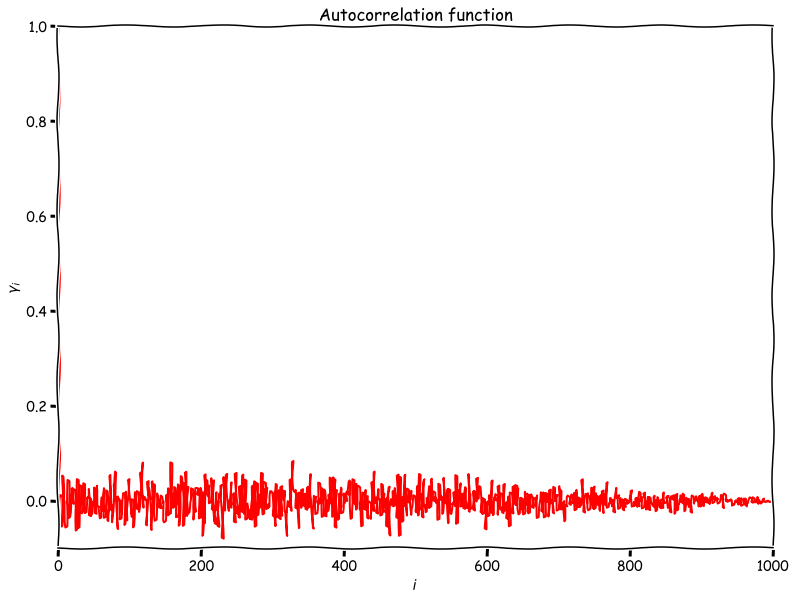

In [11]:
from math import exp, sqrt
from random import random, seed

def autocovariance(x, n, k, mean_x):
    sum = 0.0
    for i in range(0, n-k):
        sum += (x[(i+k)]-mean_x)*(x[i]-mean_x)
    return  sum/n

n = 1000
x=np.random.normal(size=n)
autocor = np.zeros(n)
figaxis = np.zeros(n)
mean_x=np.mean(x)
var_x = np.var(x)
print(mean_x, var_x)
for i in range (0, n):
    figaxis[i] = i
    autocor[i]=(autocovariance(x, n, i, mean_x))/var_x    

plt.plot(figaxis, autocor, "r-")
plt.axis([0,n,-0.1, 1.0])
plt.xlabel(r'$i$')
plt.ylabel(r'$\gamma_i$')
plt.title(r'Autocorrelation function')
plt.grid()
plt.show()
